### Louvain community detection

In [60]:
import networkx as nx
#import community as community_louvain
import community.community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

## Saved the file once Tweet_from column added. Using those file here.
data_language_german = pd.read_csv("/content/colab_3Dec.csv")

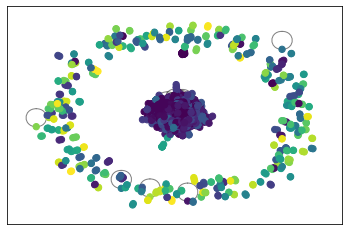

In [61]:
data_language_german = data_language_german[["Tweet_From",'Screen Name']]
edges = []
nodes = set()
tf_from = [tf for tf in data_language_german["Tweet_From"]]
edges = zip(data_language_german['Tweet_From'],data_language_german['Screen Name'])
nodes.update(tf_from)
edges = list(set(tuple(edge) for edge in edges))
nodes = list(set(nodes))
G = nx.karate_club_graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# compute the best partition
partition = community.community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [63]:
G=nx.erdos_renyi_graph(100, 0.01)
G.add_nodes_from(nodes)
G.add_edges_from(edges)
dendo = community.community_louvain.generate_dendrogram(G)
for level in range(len(dendo) - 1) :
     print("partition at level", level,"is", community.community_louvain.partition_at_level(dendo, level))

partition at level 0 is {0: 0, 1: 1, 2: 72, 3: 30, 4: 4, 5: 6, 6: 6, 7: 64, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 20, 14: 35, 15: 37, 16: 16, 17: 77, 18: 18, 19: 64, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 0, 26: 26, 27: 77, 28: 30, 29: 9, 30: 30, 31: 31, 32: 32, 33: 33, 34: 66, 35: 35, 36: 96, 37: 37, 38: 42, 39: 39, 40: 40, 41: 54, 42: 42, 43: 33, 44: 44, 45: 45, 46: 56, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 1, 53: 6, 54: 54, 55: 11, 56: 56, 57: 57, 58: 54, 59: 59, 60: 60, 61: 61, 62: 99, 63: 6, 64: 64, 65: 39, 66: 66, 67: 61, 68: 68, 69: 68, 70: 11, 71: 71, 72: 72, 73: 92, 74: 74, 75: 8, 76: 4, 77: 77, 78: 51, 79: 79, 80: 80, 81: 50, 82: 40, 83: 33, 84: 84, 85: 39, 86: 86, 87: 87, 88: 68, 89: 32, 90: 51, 91: 1, 92: 92, 93: 59, 94: 30, 95: 95, 96: 96, 97: 40, 98: 98, 99: 99, nan: 100, 'tierschutz_bund': 101, 'Dzienus': 102, 'Labonitamascota': 103, 'FLietzke': 755, 'KGS501': 161, 'OfCrustacea': 976, 'SolisStella1': 34, 'MiraFlensburg': 1102, 'jtresbach': 408, 'BentFreiwald

In [65]:
n = 5
g = nx.complete_graph(2*n)
part = dict([])
for node in g.nodes() :
     part[node] = node % 2
ind = community.community_louvain.induced_graph(part, g)
goal = nx.Graph()
goal.add_weighted_edges_from([(0,1,n*n),(0,0,n*(n-1)/2), (1, 1, n*(n-1)/2)])  # NOQA
nx.is_isomorphic(ind, goal)

True

In [66]:
G = nx.erdos_renyi_graph(100, 0.01)
partition = community.community_louvain.best_partition(G)
community.community_louvain.modularity(partition, G)

0.9026708918062472

In [67]:
import cdlib
import networkx as nx
from cdlib import algorithms
from cdlib import evaluation
from cdlib import NodeClustering
from collections import defaultdict
from networkx.algorithms import community

In [68]:
communities_greedy_mod = community.greedy_modularity_communities(G)
print("Number of communities:", len(communities_greedy_mod))

Number of communities: 53


In [69]:
label_prop_gen = community.label_propagation_communities(G)
communities_label_prop = [cluster for cluster in label_prop_gen]
print("Number of communities:", len(communities_label_prop))

Number of communities: 60


In [70]:
nc_greedy = NodeClustering(communities_greedy_mod, G, "greedy")
nc_label_prop = NodeClustering(communities_label_prop, G, "label_prop")